**Task 1:** Find a data set which is suitable for binary classification (there is no limit on the number of features or type of the features). Then, apply logistic regression with l1 norm, l2 norm, and elastic-net to this data set to find the best performing model with respect to a classification metric. Explain the reason (give support) why you picked that model as the final one.

#### Instructions to follow:

- Include all your codes here. Be sure that your code is CLEAN, READABLE, and REPRODUCIBLE.
- Put your data set into a **datasets** folder.
- Put your images (if available) into an **images** folder.
- Please return a NICE and CLEAR homework. Otherwise, it will not be graded.
- Please write YOUR OWN code. **DO NOT copy** my codes or someone else's codes.
- Please **DO NOT use** IRIS data set for this task.

## Data Decription

- Import and introduce your data set here.

The Room Occupancy data set contains 5 features and a target variable. These 5 features determine whether the room is occupied or not.
The column names are:
- Temperature: The temperature of the room in celcius.
- Humidity: Relative humidity of the room in %.
- Light: The amount of light in the room in lux.
- CO2: The amount of carbondioxide in the room in ppm.
- HumidityRatio: Humidity ratio, derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air.
- Occupancy: Occupancy of the room, 0 for not occupied, 1 for occupied status.

In [1]:
import pandas as pd

room = pd.read_csv("datasets/Room_Occupancy.csv")
room

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [2]:
room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.1 KB


This data set has no null values.

In [3]:
#Dropping the duplicate rows.
room_occupancy = room.drop_duplicates()
room_occupancy

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,24.356667,25.700000,813.000000,1123.000000,0.004849,1


## Information on Elastic-Net Regularization

- Introduce elastic-net regularization for logistic regression. Discuss advantages and disadvantages of elastic-net compared to l1 and l2 norms.

Elastic-Net Regularization is a regularization technique that uses both L1 and L2 regularizations to produce most optimized output. 
Elastic-net has advantages over l1 and l2 norms. For instance, it can handle multicollinearity better than l1 by grouping correlated features and selecting the most representative ones. Additionally, it can reduce model complexity by eliminating irrelevant features, which is more effective than l2. 
But it also has disadvantages such as requiring more computational resources and time due to two regularization parameters and a cross-validation process.

## Classifier Implementation

- Implement your classifiers here.
- During the implementation choose an appropriate classification metric for your problem. Give the reason why you chose that
metric.

In [4]:
X = room_occupancy.drop(["Occupancy"], axis=1)
y = room_occupancy["Occupancy"]

In [5]:
#Setting the configuration to get the outputs as dataframes.
from sklearn import set_config
set_config(transform_output="pandas")

In [6]:
#Splitting the data into train and test. Think of the training data as training + validation.
#Using the stratify parameter so that the 0's and 1's in y_train and y_test are equally distributed.
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2002, stratify = y)

Penalized models are sensitive to the scale of the features. Because of this, standardizing the features before model fitting is very important.

In order to find the best method, we have to learn the value of C as well. We will perform cross validation for each given value of C. Each value of C will have a cross validated average accuracy. Among all possible values for C, choose the optimum C as the one that gives the highest average accuracy.

Stratified k fold keeps the ratio of zeros and ones equal in each fold.


In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Instantiating the classifier.
#The choice of the algorithm is liblinear for l1 penalty.

pipe1 = make_pipeline(StandardScaler(), 
                     LogisticRegression(solver='liblinear'))

from sklearn.model_selection import StratifiedKFold, GridSearchCV
import numpy as np

param_grid1 = [{'logisticregression__penalty': ['l1'],
               'logisticregression__C': np.logspace(-4, 4, 20) 
               }
              ]  
               
kcv_index = StratifiedKFold(n_splits= 5, shuffle = True, random_state = 2001) 

#Instantiating the estimator.
grid_search1 = GridSearchCV(estimator = pipe1, param_grid = param_grid1, scoring ='accuracy', cv = kcv_index, return_train_score=True) 

In [50]:
grid_search1.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2001, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid=[{'logisticregression__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'logisticregression__penalty': ['l1']}],
             return_train_score=True, scoring='accuracy')

In [59]:
print("Optimum Model:", grid_search1.best_params_)
print("CV Validation Accuracy: %.4f %%" % (grid_search1.best_score_*100))
print("Accuracy on train+val data: %.4f %%"% (grid_search1.score(X_train_val, y_train_val)*100))
print("Accuracy on test data: %.4f %%"% (grid_search1.score(X_test, y_test)*100))

Optimum Model: {'logisticregression__C': 206.913808111479, 'logisticregression__penalty': 'l1'}
CV Validation Accuracy: 97.6286 %
Accuracy on train+val data: 97.5315 %
Accuracy on test data: 98.8395 %


In [52]:
#The choice of the algorithm is liblinear for l2 penalty.

pipe2 = make_pipeline(StandardScaler(), 
                     LogisticRegression(solver='liblinear'))

param_grid2 = [{'logisticregression__penalty': ['l2'],
               'logisticregression__C': np.logspace(-4, 4, 20) 
               }
              ]  
               

kcv_index = StratifiedKFold(n_splits= 5, shuffle = True, random_state = 2001) 

#Instantiating the estimator.
grid_search2 = GridSearchCV(estimator = pipe2, param_grid = param_grid2, scoring ='accuracy', cv = kcv_index, return_train_score=True) 

In [53]:
grid_search2.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2001, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid=[{'logisticregression__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'logisticregression__penalty': ['l2']}],
             return_train_score=True, scoring='accuracy')

In [58]:
print("Optimum Model:", grid_search2.best_params_)
print("CV Validation Accuracy: %.4f %%" % (grid_search2.best_score_*100))
print("Accuracy on train+val data: %.4f %%"% (grid_search2.score(X_train_val, y_train_val)*100))
print("Accuracy on test data: %.4f %%"% (grid_search2.score(X_test, y_test)*100))

Optimum Model: {'logisticregression__C': 545.5594781168514, 'logisticregression__penalty': 'l2'}
CV Validation Accuracy: 97.6286 %
Accuracy on train+val data: 97.5315 %
Accuracy on test data: 98.8395 %


In [55]:
#The choice of the algorithm is saga for elastic-net penalty.


kcv_index = StratifiedKFold(n_splits= 5, shuffle = True, random_state = 2001) 

from sklearn.linear_model import LogisticRegressionCV
elastic_net_classifier = LogisticRegressionCV(Cs=np.logspace(-4, 4, 20), cv=kcv_index, max_iter=5000, penalty='elasticnet', solver='saga', l1_ratios=np.linspace(0,1,10))



elastic_net_classifier.fit(X_train_val, y_train_val)



LogisticRegressionCV(Cs=array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                     cv=StratifiedKFold(n_splits=5, random_state=2001, shuffle=True),
                     l1_ratios=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                     max_iter=5000, penalty='elasticnet', solver='saga')

In [57]:
print("Accuracy on train+val data: %.4f %%"% (elastic_net_classifier.score(X_train_val, y_train_val)*100))
print("Accuracy on test data: %.4f %%"% (elastic_net_classifier.score(X_test, y_test)*100))

Accuracy on train+val data: 97.6283 %
Accuracy on test data: 98.8395 %


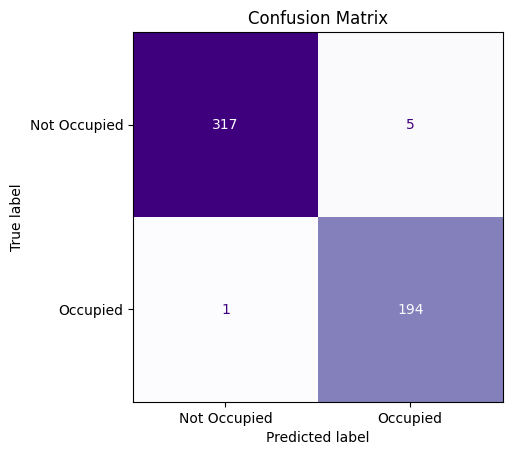

In [63]:
#Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(grid_search1.best_estimator_, 
                                           X_test, y_test, 
                                           display_labels=["Not Occupied","Occupied"], 
                                           cmap="Purples",
                                           colorbar=False)
                                           
cm.ax_.set_title("Confusion Matrix");

The important thing for this data is to predict the not occupied rooms correctly. The metric I used was 'accuracy'. This classifier focuses on getting the 'not occupied's true. So 'accuracy' metric is suitable here.

## Conclusion

- Provide detailed explanation on why you picked this model as the final model here.

## References

- Room Occupancy dataset: https://www.kaggle.com/datasets/sachinsharma1123/room-occupancy
- https://iq.opengenus.org/elastic-net-regularization/
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://www.linkedin.com/advice/0/what-advantages-disadvantages-elastic-net
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
- Gül İnan Lecture Materials: https://github.com/MAT388E-Spring23/Lecture_Materials 